# Gait Monitoring for Parkinson's Disease Patients
**Mentor**: Arthur Tay

## Project Description
The objective of this project is to monitor the gait patterns for people with Parkinson Disease. We will analyse the gait for PD patients during freezing and non-freezing (normal) events. Various parameters (e.g. cadence, step lengths, stride lengths, etc) related to gait will be derived from motion sensors (accelerometers, gyroscopes, magnetometers) using public datasets of PD patients. We will then investigate which of these parameters is most suitable for classification for freezing of gait in PD patients.

## Final Product
To make use of signal processing algorithms in extracting gait parameters from motion sensors and identifying most suitable parameters for classification of freezing of gait in PD patients.

## Methodology
Students will first need to review and understands how to extract gait parameters from motion sensors. There are different algorithms in the literature and they will need to investigate which is most suitable. They will then make use of a PD patient public dataset to test out their methods. If time permits, they will learn basic machine learning tools for classification.

## Dataset 1
[link](https://www.physionet.org/content/gaitdb/1.0.0/)

### Data Description

Walking stride interval time series included are from 15 subjects: 5 healthy young adults (23 - 29 years old), 5 healthy old adults (71 - 77 years old), and 5 older adults (60 - 77 years old) with Parkinson's disease. The file name indicates old (o), young (y) or Parkinson's disease (pd). For the old and young subjects, the age (in years) is also included in the filename.



Subjects walked continuously on level ground around an obstacle-free path. The stride interval was measured using ultra-thin, force sensitive resistors placed inside the shoe. The analog force signal was sampled at 300 Hz with a 12 bit A/D converter, using an ambulatory, ankle-worn microcomputer that also recorded the data. Subsequently, the time between foot-strikes was automatically computed. The method for determining the stride interval is a modification of a previously validated method that has been shown to agree with force-platform measures, a “gold” standard.



Data were collected from the healthy subjects as they walked in a roughly circular path for 15 minutes, and from the subjects with Parkinson’s disease as they walked for 6 minutes up and down a long hallway.

### Imports

In [128]:
!pip install np

You should consider upgrading via the 'c:\users\prannaya\anaconda3\python.exe -m pip install --upgrade pip' command.


In [56]:
# imports

import numpy as np # main library for numeric calculations
import pandas as pd # main library for data analysis
import matplotlib.pyplot as plt # main library for data plotting
import seaborn as sns
sns.set() # mainly to set style of the plot
from glob import glob # check files
from math import *

"""
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)"""

import warnings
warnings.filterwarnings('ignore') # literally to ignore all the warnings that don't matter

%matplotlib inline
# to place plotting inside the diagram

### Get Data

In [6]:
data = []
names = []
for i in sorted(glob("*.txt")):
  names.append(i)
  data.append(pd.read_csv(i, sep="\t", names=["time", "stride_time"]))

data[0]

,time,stride_time
0,30.797,1.023
1,31.820,1.030
2,32.850,1.017
3,33.867,1.027
4,34.893,1.043
...,...,...
810,865.780,0.997
811,866.777,0.993
812,867.770,1.007
813,868.777,1.013


### Plotting Initial Graphs

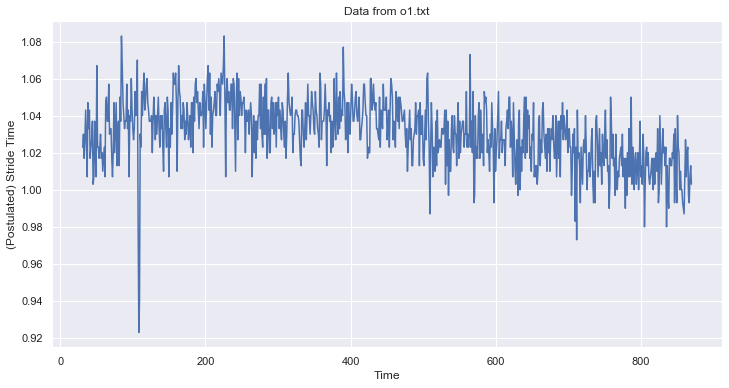

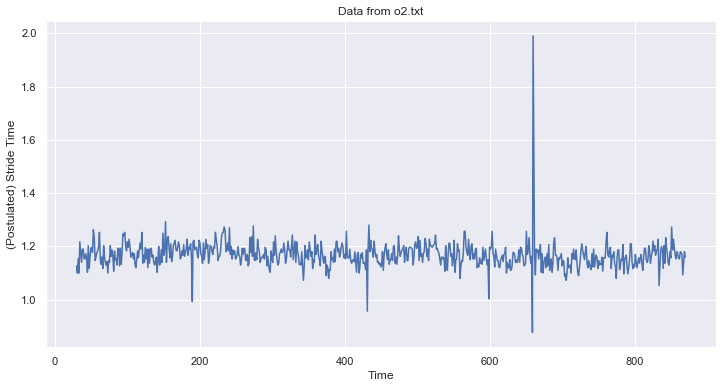

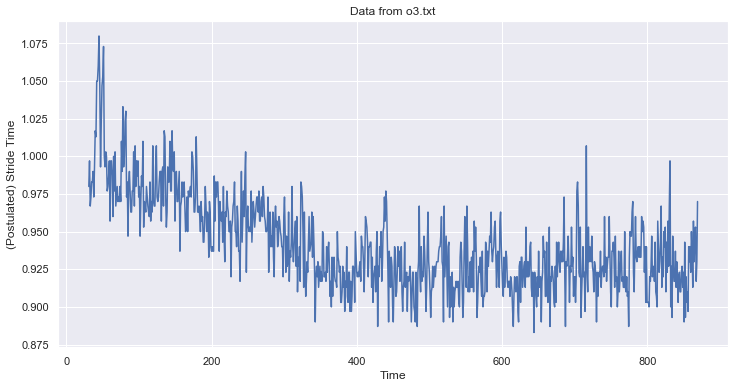

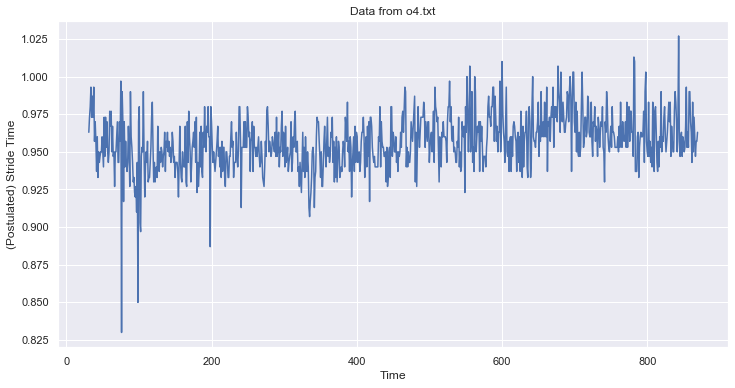

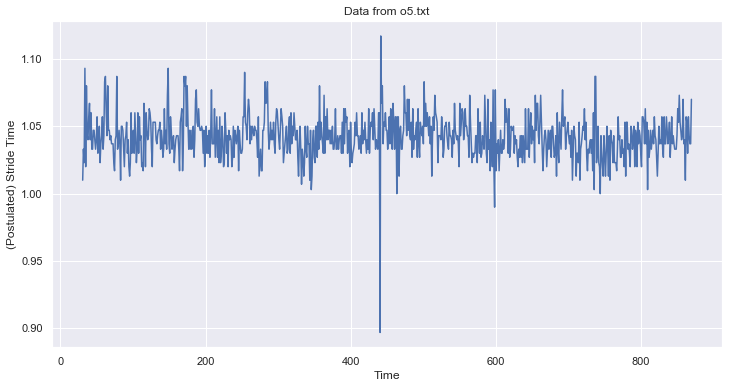

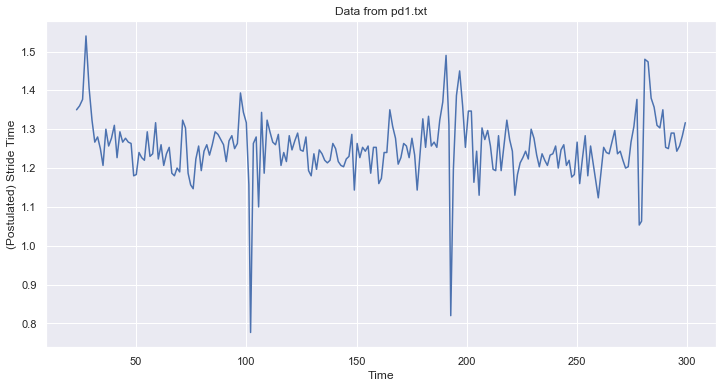

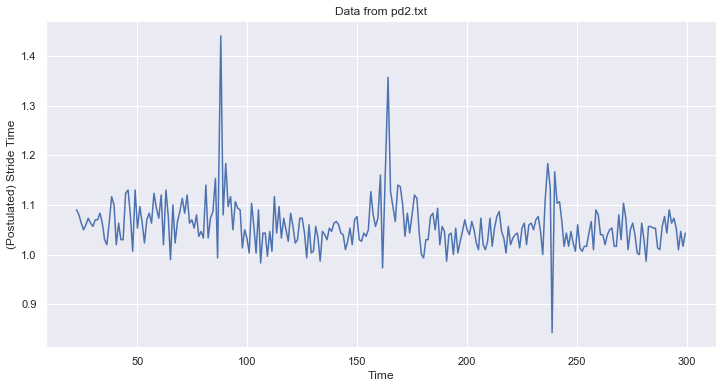

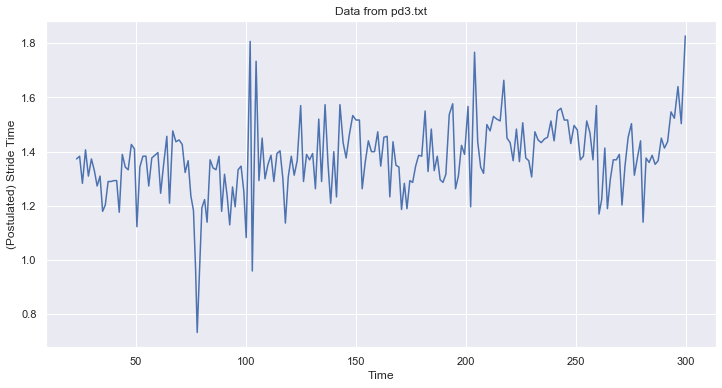

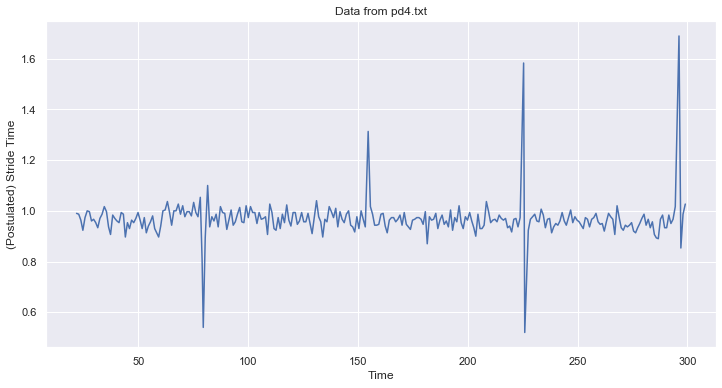

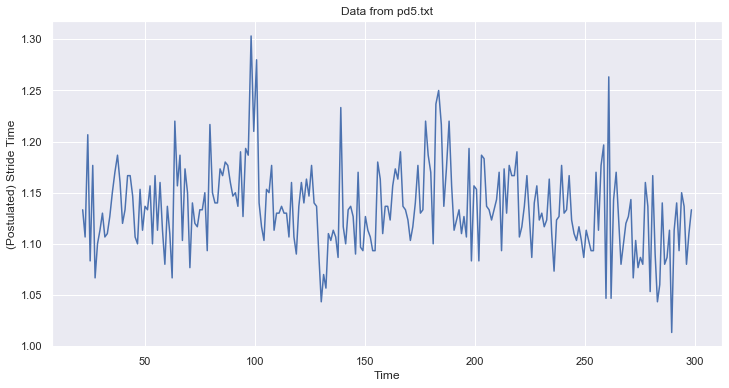

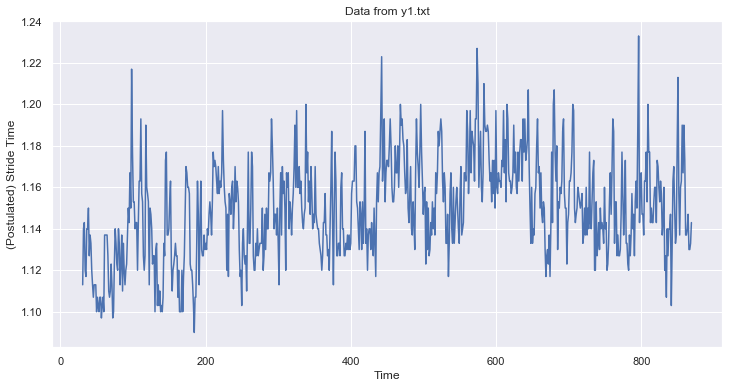

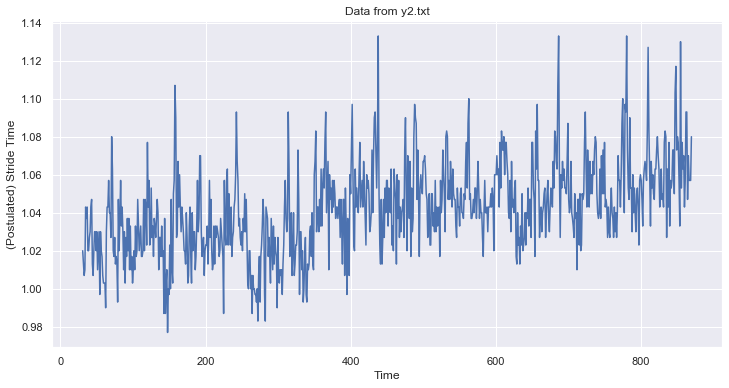

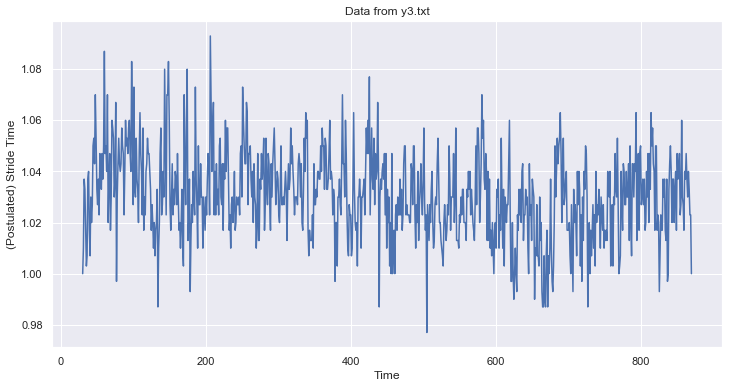

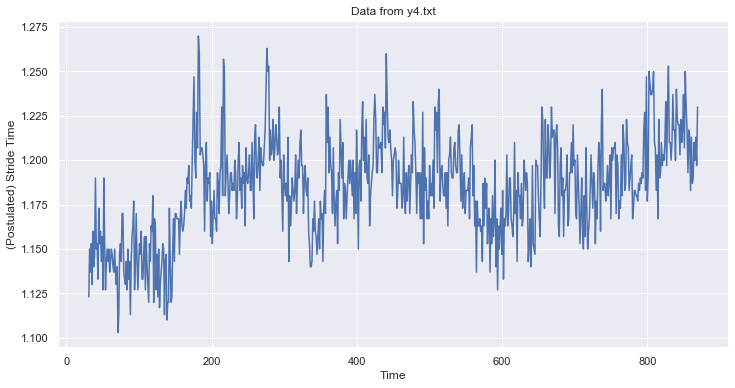

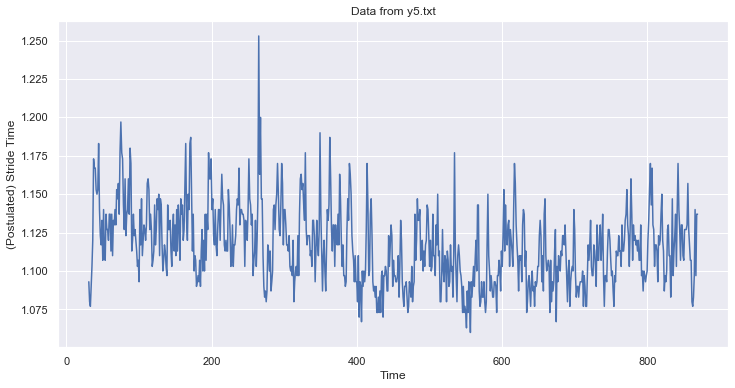

In [63]:
for i in range(len(data)):
  plt.figure(figsize=(12, 6))
  plt.plot(data[i]["time"], data[i]["stride_time"])
  plt.title("Data from "+names[i])
  plt.ylabel("(Postulated) Stride Time")
  plt.xlabel("Time")
  plt.show()

### Logistic Regression Functions

In [67]:
def sigmoid(z):
    return 1/(1 + np.exp(-z));

def logReg(iterations=50):
    global theta
    alpha = 10
    J = float("inf")
    for i in range(iterations):
        h = sigmoid(theta @ X)[np.newaxis].T
        J_temp = (-Y.T @ np.log(h)) - ((1 - Y).T @ np.log(1 - h))
        if isnan(J_temp) or isinf(J_temp): break
        elif J_temp > J: print(J_temp)
        J = J_temp
        theta = theta - alpha/m * (X @ (h - Y)).T[0]
    print(theta)

### Variance-based Analysis

In [64]:
variances = []
for i in range(15):
    var = data[i].var()["stride_time"]
    print(names[i][:-5]+":", var)
    variances.append(var)

o: 0.0003150203102154013
o: 0.0025416611883789233
o: 0.0009108964281580096
o: 0.00033811834137756824
o: 0.0002692188292773129
pd: 0.006372048896702135
pd: 0.00254124891039967
pd: 0.0197283147651563
pd: 0.006288075749128922
pd: 0.0017474187480762782
y: 0.0005700363342540924
y: 0.0005673018078695489
y: 0.0002956847106940924
y: 0.0007965643741085166
y: 0.0006283753293481047


<BarContainer object of 15 artists>

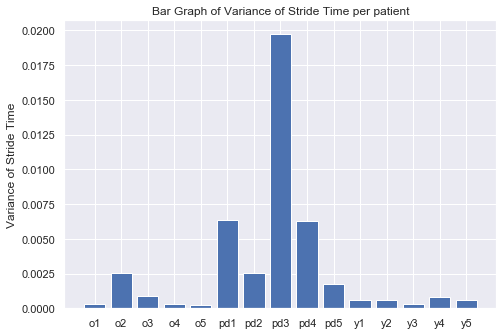

In [65]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Variance of Stride Time")
ax.set_title("Bar Graph of Variance of Stride Time per patient")
ax.bar([i[:-4] for i in names], variances)

#### Logistic Regression Data Preparation

In [66]:
X = np.array([[1]*15, variances])
Y = np.array([0]*5 + [1]*5 + [0]*5)[np.newaxis].T
theta = np.array([0, 1])
m = 15

#### Logistic Regression Brute Force

In [69]:
logReg(5000000) # tried twice

[  -4.50241442 2090.35672887]


#### Testing Validity

In [70]:
theta0, theta1 = tuple(theta)
for i in range(15):
    print(names[i][:-5]+":", sigmoid(theta0 + theta1*variances[i]))

h = sigmoid(theta @ X)
np.round(h)

o: 0.020960965456681777
o: 0.6922297080275551
o: 0.06924688221484637
o: 0.021975071354770264
o: 0.019083728829316665
pd: 0.9998518949865342
pd: 0.6920460713603303
pd: 1.0
pd: 0.999823481270244
pd: 0.2994987554473062
y: 0.03520134528144031
y: 0.03500772762026932
y: 0.020147380465463514
y: 0.05534096091562478
y: 0.03958611787942368


array([0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

### Final Plots

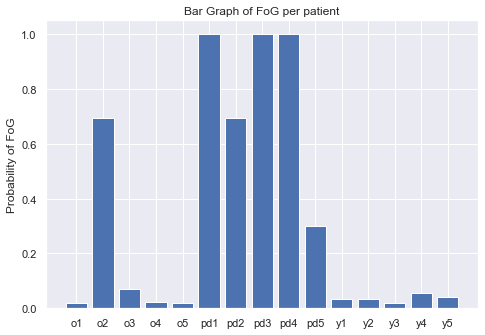

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Probability of FoG")
ax.set_title("Bar Graph of FoG per patient")
ax.bar([i[:-4] for i in names], h)
plt.show()

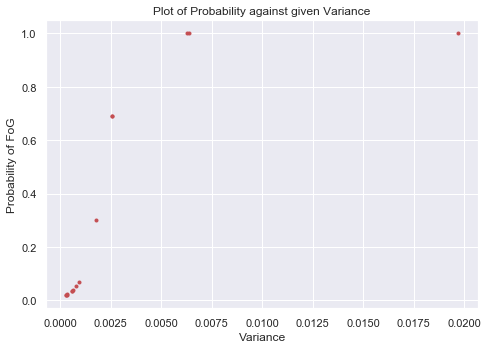

In [80]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Variance")
ax.set_ylabel("Probability of FoG")
ax.set_title("Plot of Probability against given Variance")
ax.plot(variances, h, "r.")
plt.show()

### Precision, Recall, Accuracy and F1 Scores
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
accuracy = (tp+tn)/15
f1 = 2(recall)(precision)/(recall+precision)

In [85]:
Y.T[0] == np.round(h)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [89]:
accuracy = sum(Y.T[0] == np.round(h))/m
accuracy

0.8666666666666667

In [91]:
preds = np.round(h)
actuals = Y.T[0]
tp = fp = tn = fn = 0
for i in range(m):
    actual = actuals[i]
    pred = preds[i]
    if actual == 1 and pred == 1: tp += 1
    elif actual == 0 and pred == 1: fp += 1
    elif actual == 0 and pred == 0: tn += 1
    else: fn += 1

print(tp, fp, tn, fn)

4 1 9 1


In [92]:
precision = tp/(tp+fp)
precision

0.8

In [93]:
recall = tp/(tp+fn)
recall

0.8

In [94]:
specificity = tn/(tn+fp)
specificity

0.9

In [98]:
f1 = 2*(recall)*(precision)/(recall+precision)
round(f1, 1)

0.8

| Precision | Recall | Specificity | Accuracy | F1 Score |
| --- | --- | --- | --- | --- |
| 0.80 | 0.80 | 0.90 | 0.867 | 0.80 |

## Dataset 2
(suggested by Prof Tay)
[link](https://archive.ics.uci.edu/ml/datasets/Daphnet+Freezing+of+Gait#:~:text=Data%20Set%20Information%3A,on%20generating%20many%20freeze%20events.)

### Data Description

The Daphnet Freezing of Gait Dataset is a dataset devised to benchmark automatic methods to recognize gait freeze from wearable acceleration sensors placed on legs and hip.

The dataset was recorded in the lab with emphasis on generating many freeze events. Users performed there kinds of tasks: straight line walking, walking with numerous turns, and finally a more realistic activity of daily living (ADL) task, where users went into different rooms while fetching coffee, opening doors, etc.

This dataset is the result of a collaboration between the Laboratory for Gait and Neurodynamics, Tel Aviv Sourasky Medical Center, Israel and the Wearable Computing Laboratory, ETH Zurich, Switzerland. Recordings were run at the Tel Aviv Sourasky Medical Center in 2008. The study was approved by the local Human Subjects Review Committee, and was performed in accordance with the ethical standards of the Declaration of Helsinki.

### Data Attributes
1. Time of sample in millisecond
2. Ankle (shank) acceleration - horizontal forward acceleration (mg)
3. Ankle (shank) acceleration - vertical (mg)
4. Ankle (shank) acceleration - horizontal lateral (mg)
5. Upper leg (thigh) acceleration - horizontal forward acceleration (mg)
6. Upper leg (thigh) acceleration - vertical (mg)
7. Upper leg (thigh) acceleration - horizontal lateral (mg)
8. Trunk acceleration - horizontal forward acceleration (mg)
9. Trunk acceleration - vertical (mg)
10. Trunk acceleration - horizontal lateral (mg)
11. Annotations (see Annotations section)

#### Annotations
The meaning of the annotations are as follows:
0: not part of the experiment. For instance the sensors are installed on the user or the user is performing activities unrelated to the experimental protocol, such as debriefing
1: experiment, no freeze (can be any of stand, walk, turn)
2: freeze

### Get Data

In [109]:
daphnet = []
names = []
for i in sorted(glob("dataset/*.txt")):
  names.append(i.split("\\")[-1])
  daphnet.append(pd.read_csv(i, sep=" ", names=["time", "shank_h_fd", "shank_v", "shank_h_l", "thigh_h_fd", "thigh_v", "thigh_h_l", "trunk_h_fd", "trunk_v", "trunk_h_l", "annotations"])[["time", "thigh_h_fd", "thigh_v", "thigh_h_l", "annotations"]])

daphnet[0]

,time,thigh_h_fd,thigh_v,thigh_h_l,annotations
0,15,0,0,0,0
1,31,0,0,0,0
2,46,0,0,0,0
3,62,0,0,0,0
4,78,0,0,0,0
...,...,...,...,...,...
151982,2374734,9,-46,-1000,0
151983,2374750,-9,-27,-979,0
151984,2374765,-18,-37,-979,0
151985,2374781,9,-46,-969,0


S01R01.txt


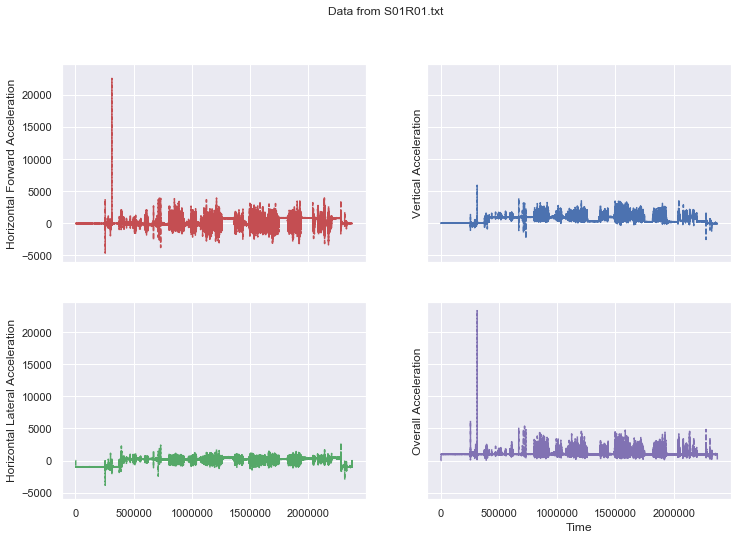

S01R02.txt


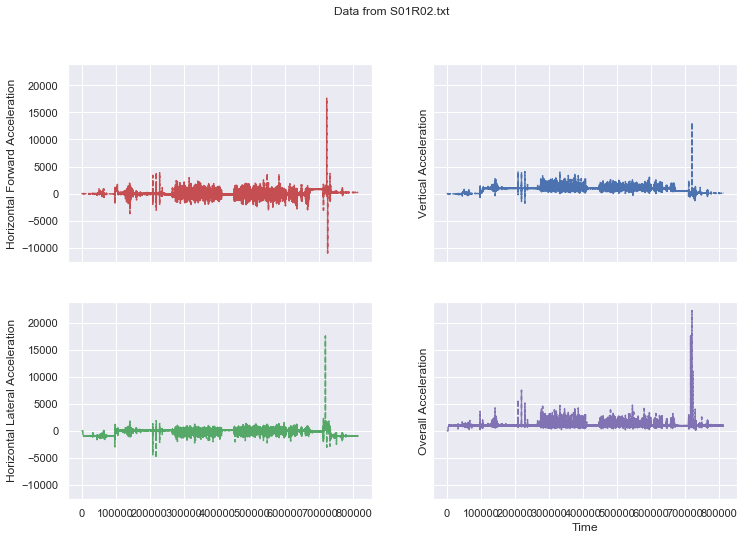

S02R01.txt


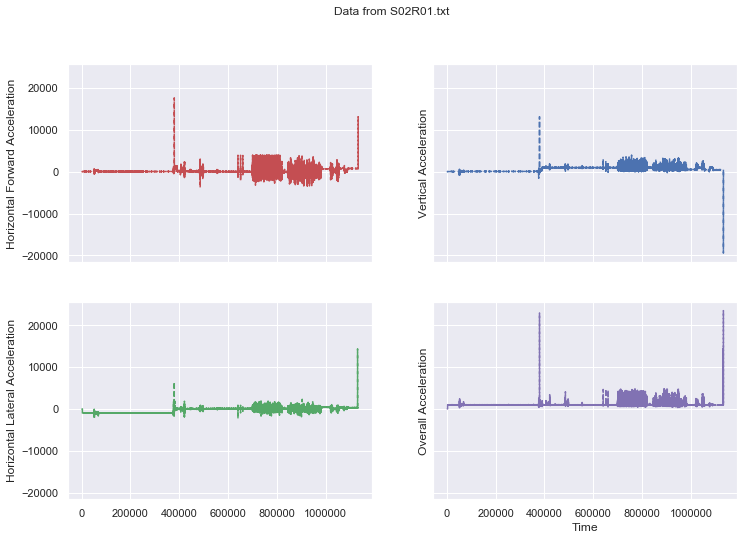

S02R02.txt


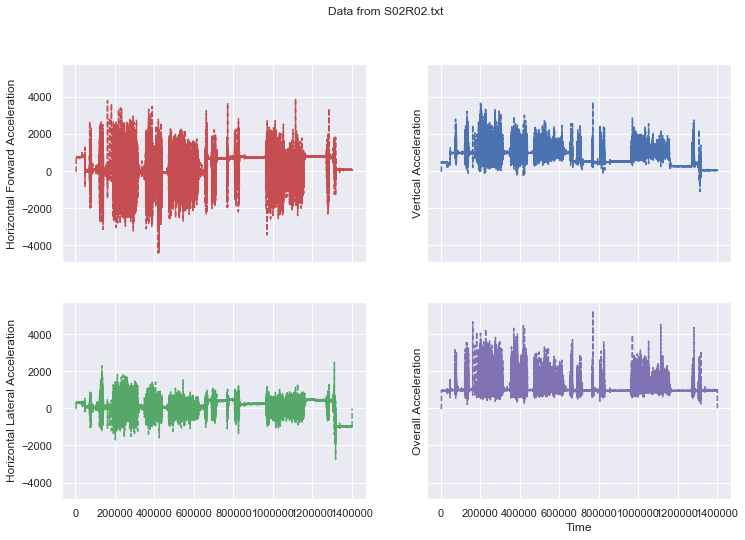

S03R01.txt


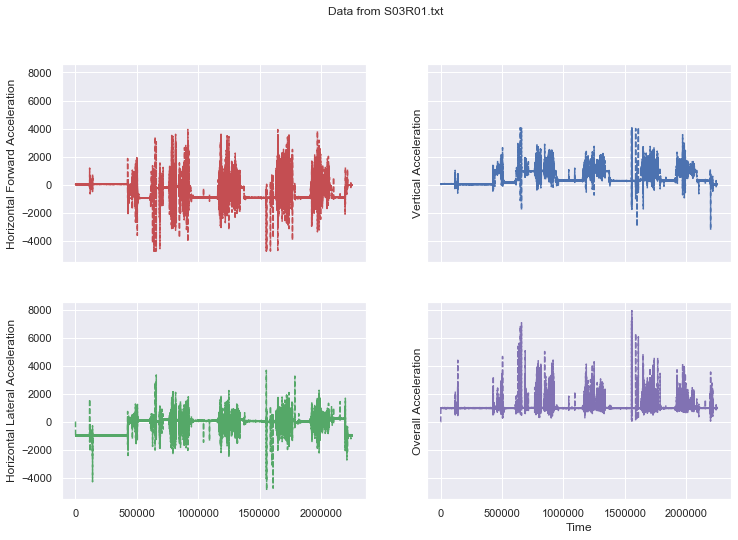

S03R02.txt


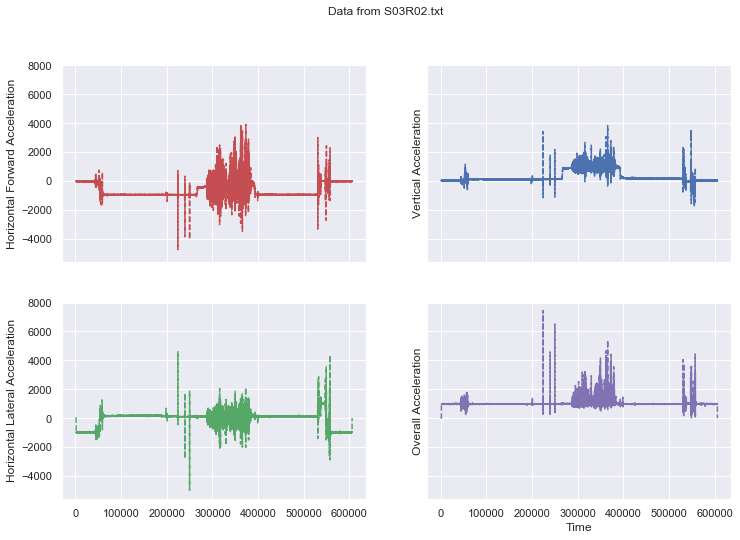

S03R03.txt


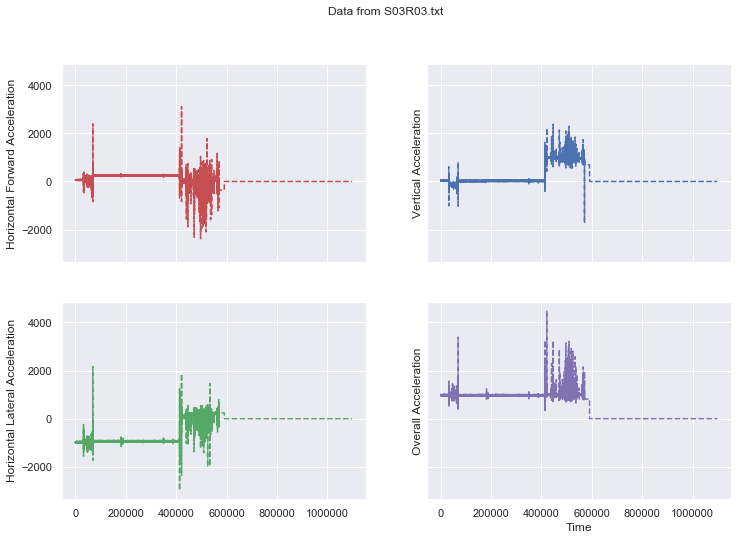

S04R01.txt


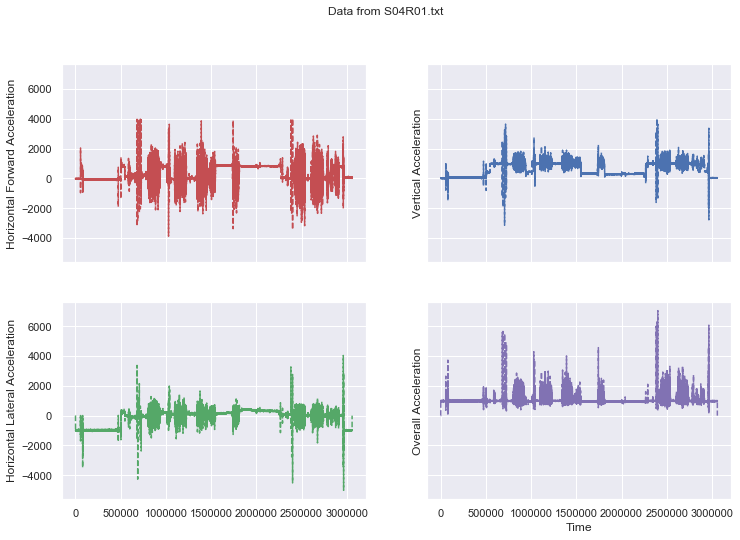

S05R01.txt


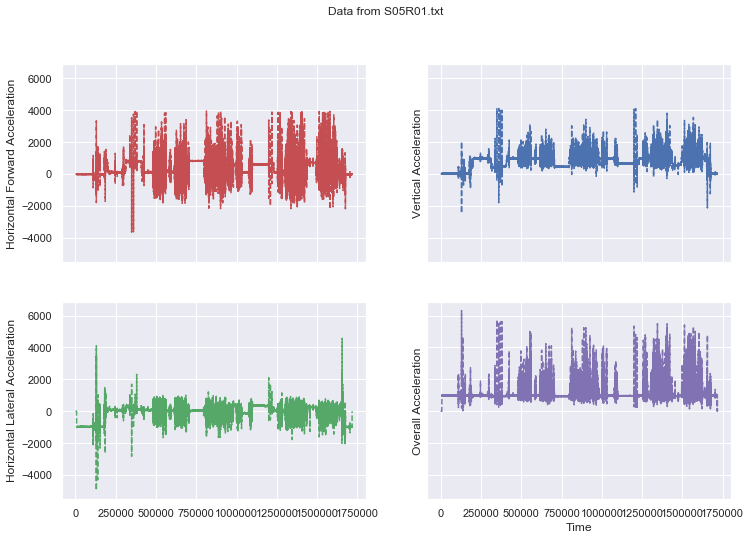

S05R02.txt


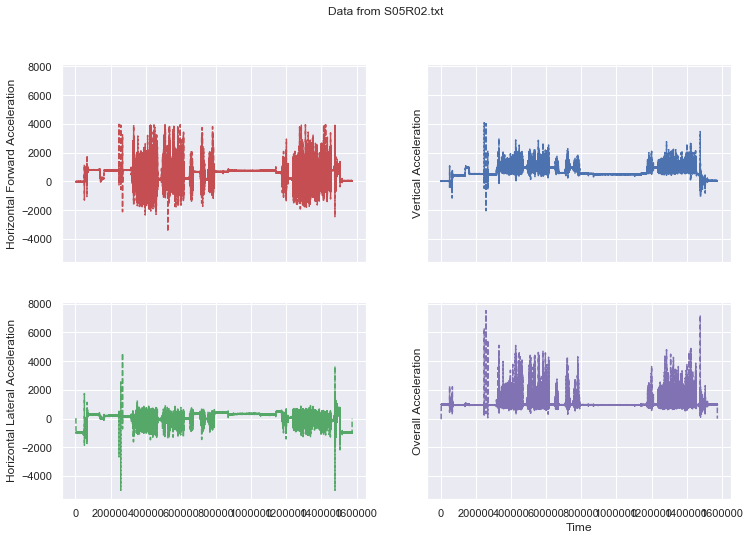

S06R01.txt


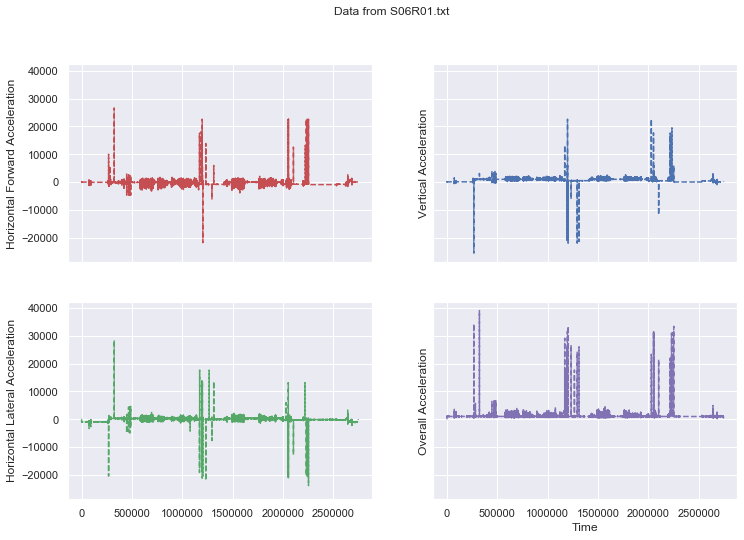

S06R02.txt


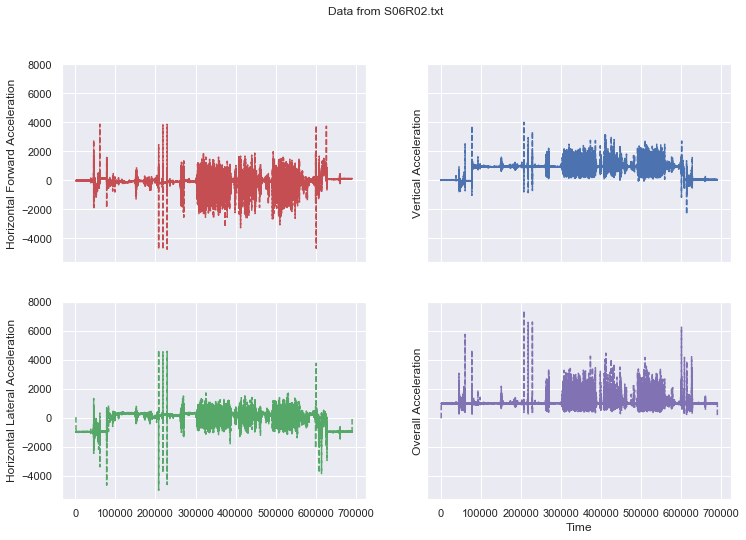

S07R01.txt


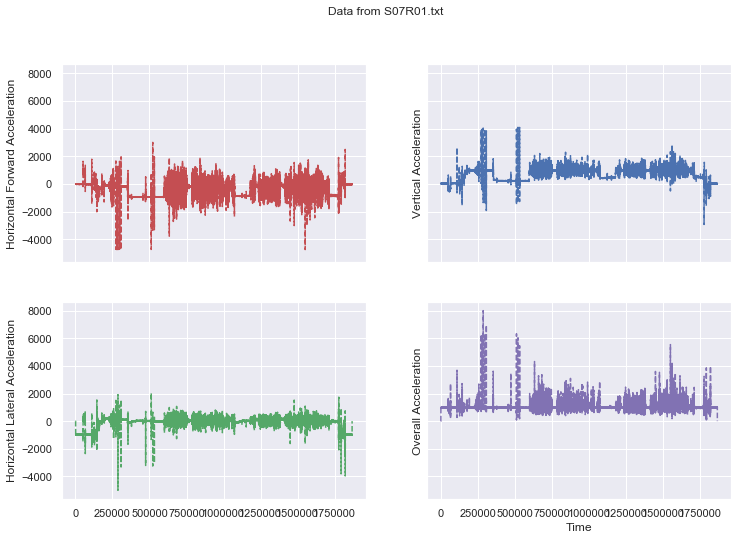

S07R02.txt


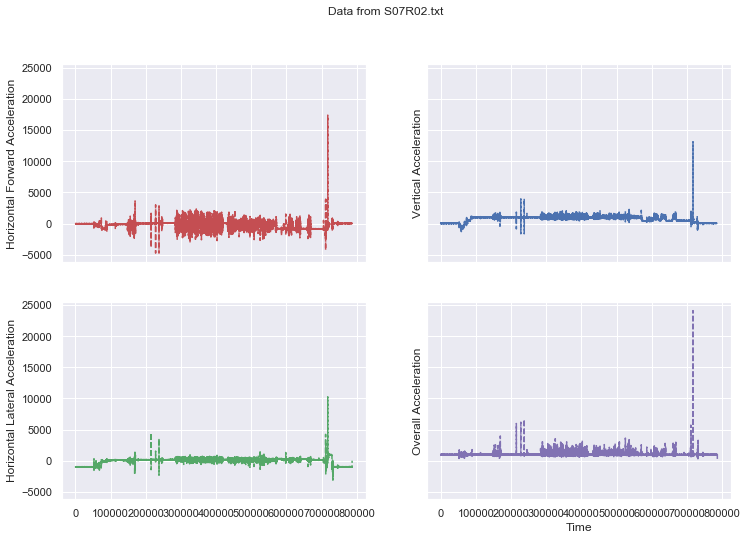

S08R01.txt


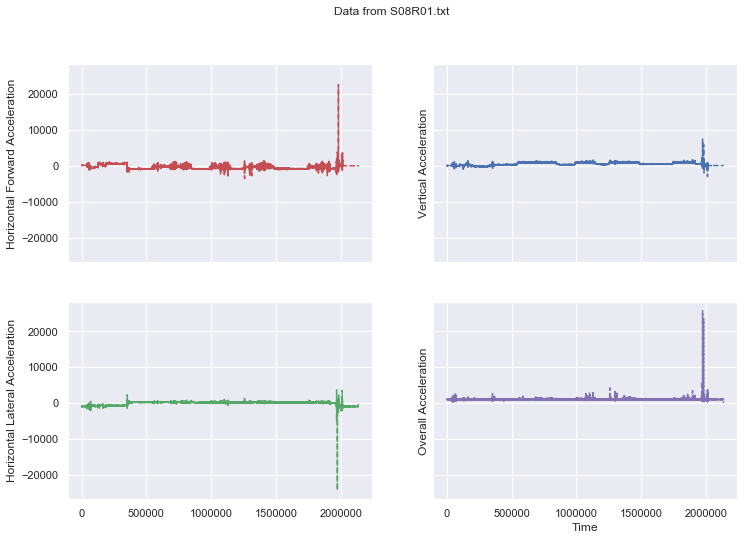

S09R01.txt


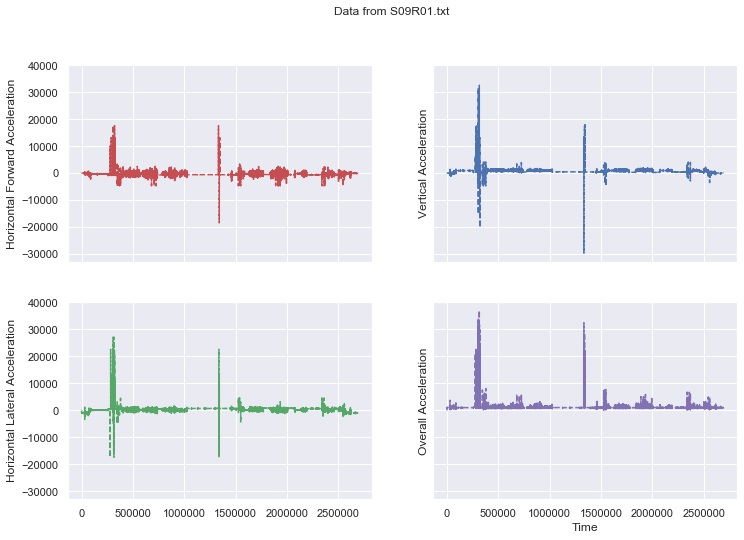

S10R01.txt


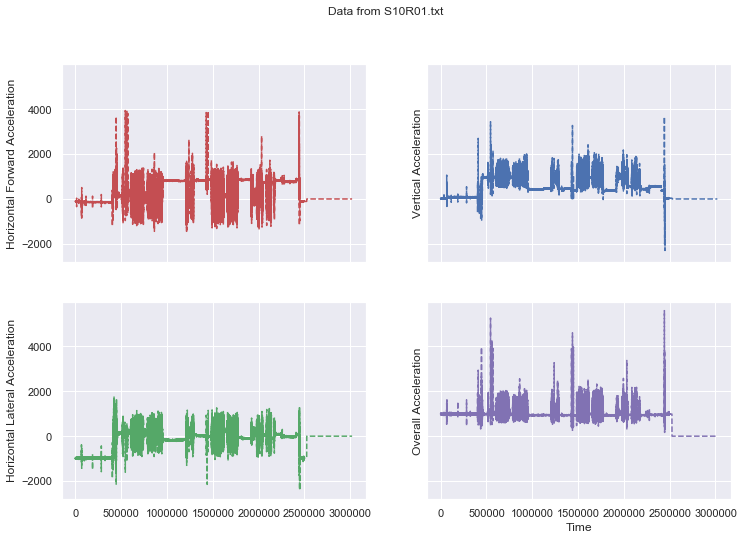

In [122]:
for i in range(len(daphnet)):
    print(names[i])
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))
    fig.suptitle("Data from "+names[i])
    plt.xlabel("Time")
    
    ax1 = axes[0][0]
    ax1.plot(daphnet[i]["time"], daphnet[i]["thigh_h_fd"], 'r--')
    ax1.set_ylabel("Horizontal Forward Acceleration")
    
    ax2 = axes[0][1]
    ax2.plot(daphnet[i]["time"], daphnet[i]["thigh_v"], 'b--')
    ax2.set_ylabel("Vertical Acceleration")
    
    ax3 = axes[1][0]
    ax3.plot(daphnet[i]["time"], daphnet[i]["thigh_h_l"], 'g--')
    ax3.set_ylabel("Horizontal Lateral Acceleration")
    
    ax4 = axes[1][1]
    ax4.plot(daphnet[i]["time"], np.sqrt(daphnet[i]["thigh_h_l"]**2 + daphnet[i]["thigh_v"]**2 + daphnet[i]["thigh_h_fd"]**2), 'm--')
    ax4.set_ylabel("Overall Acceleration")
    
    plt.show()

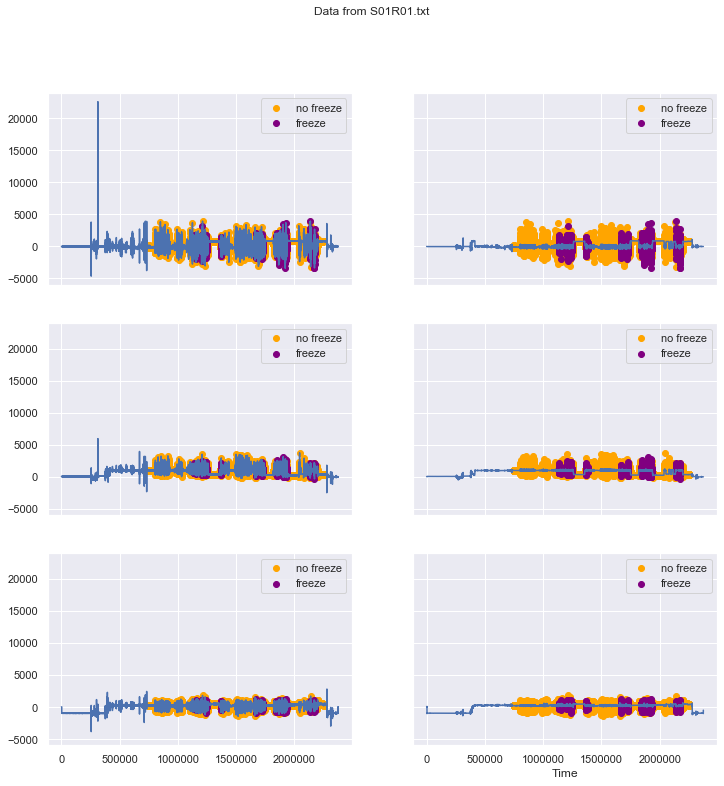

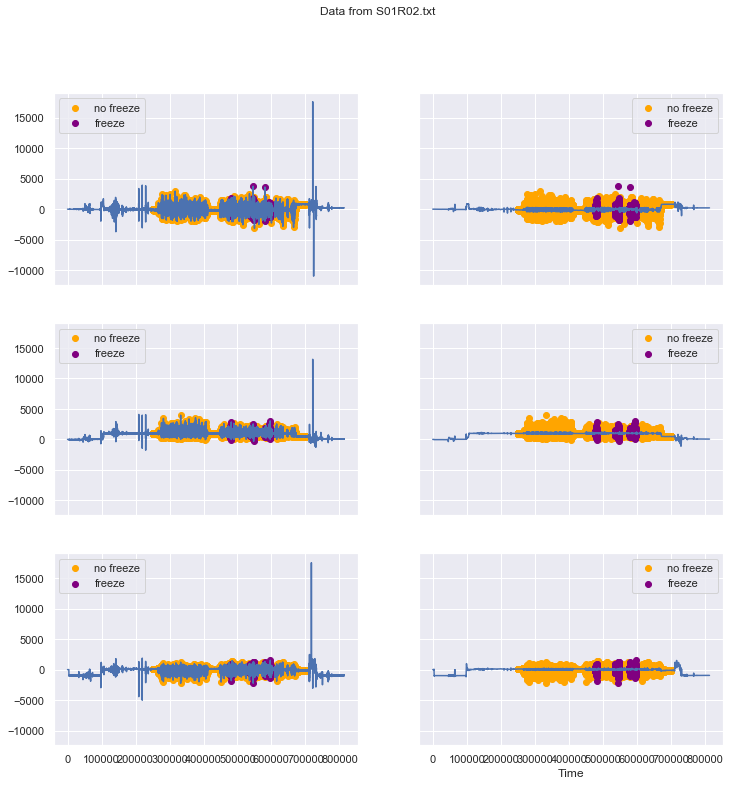

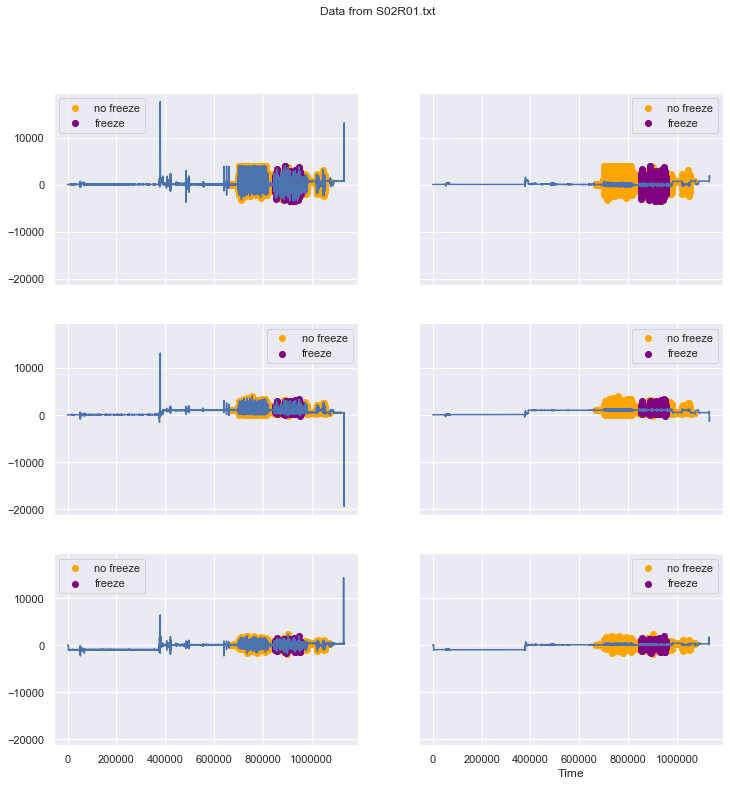

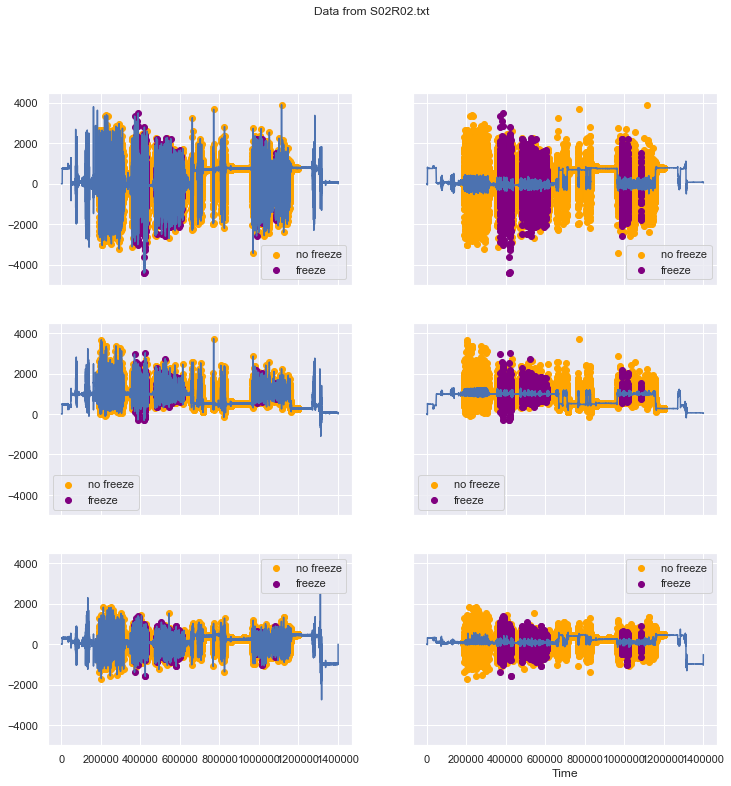

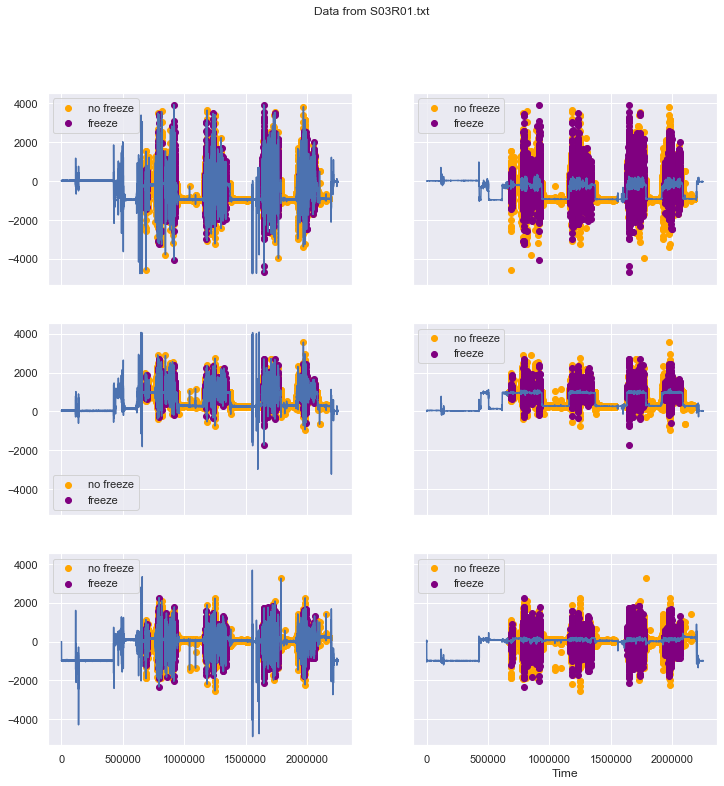

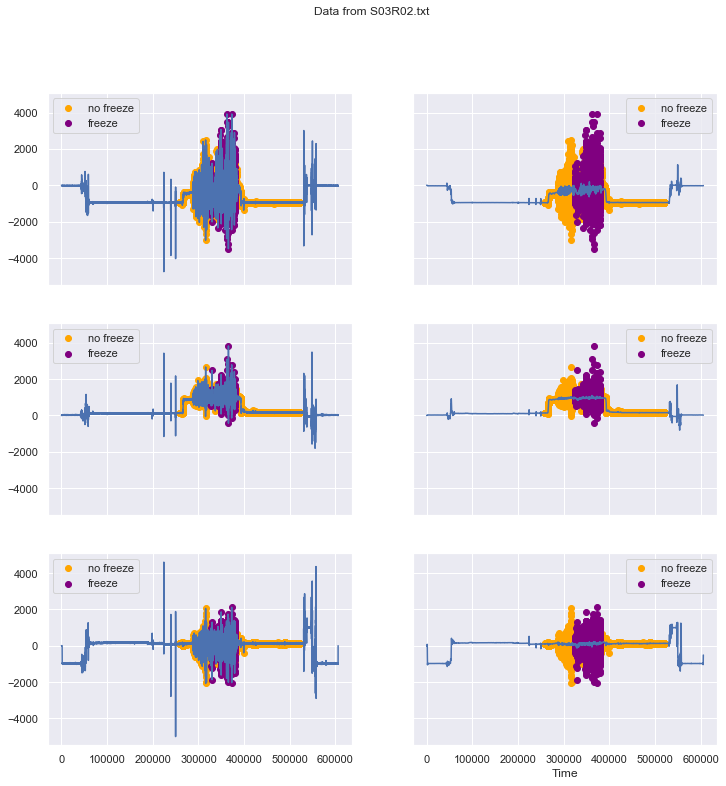

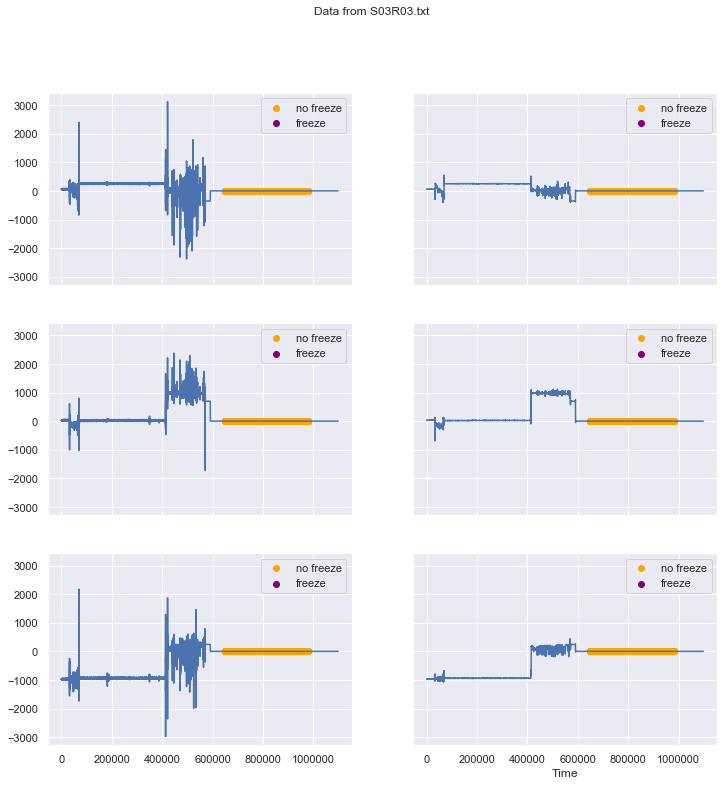

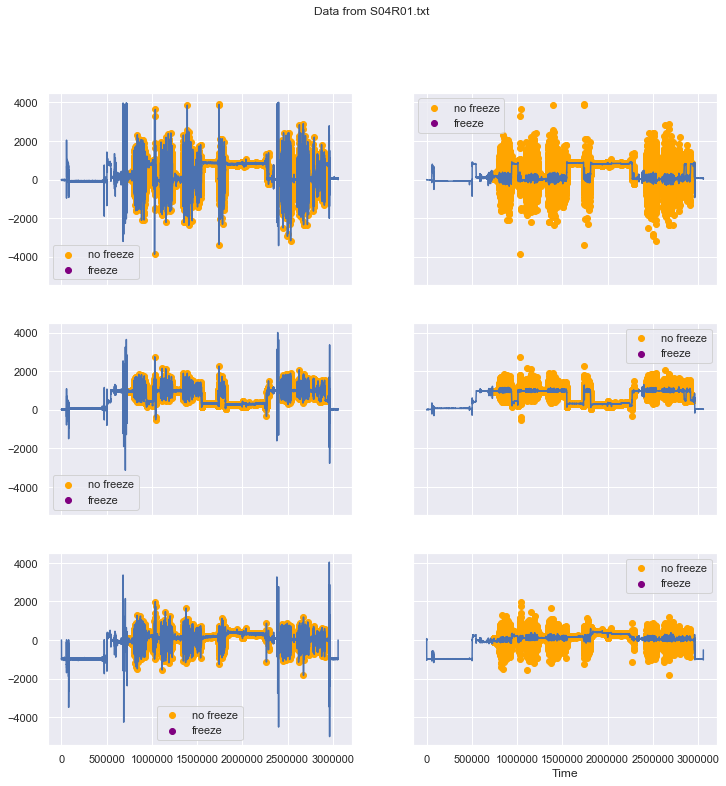

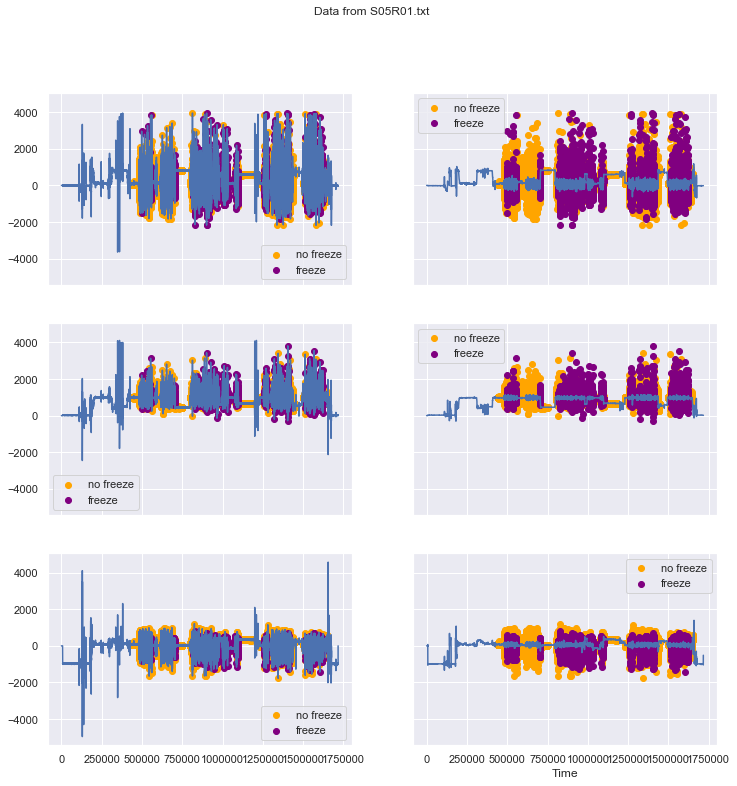

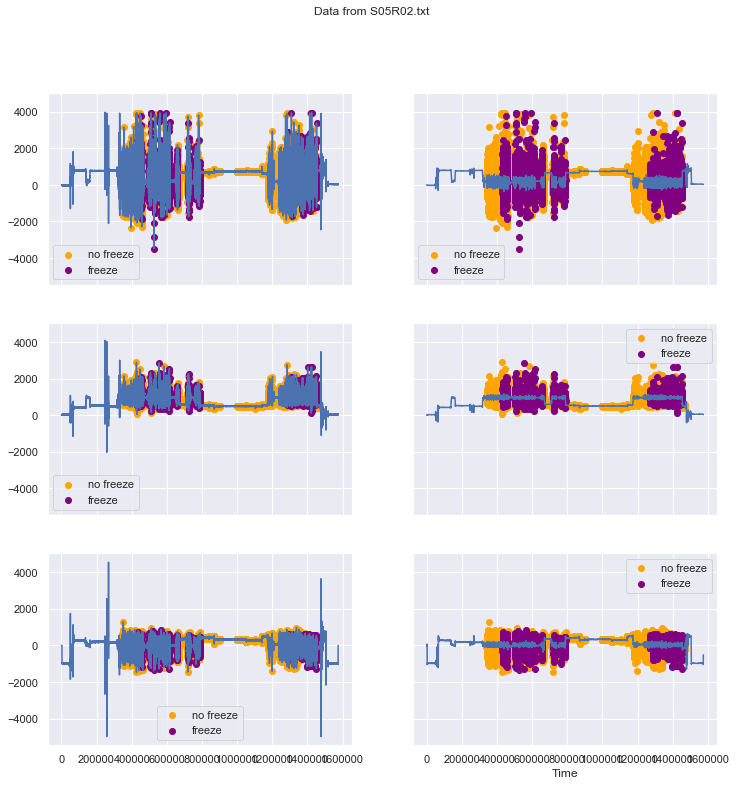

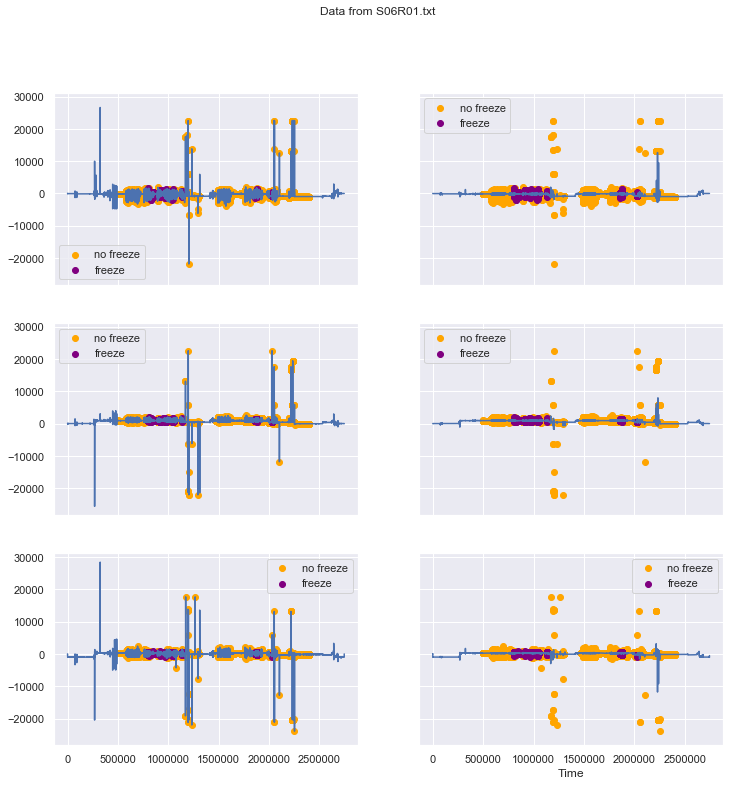

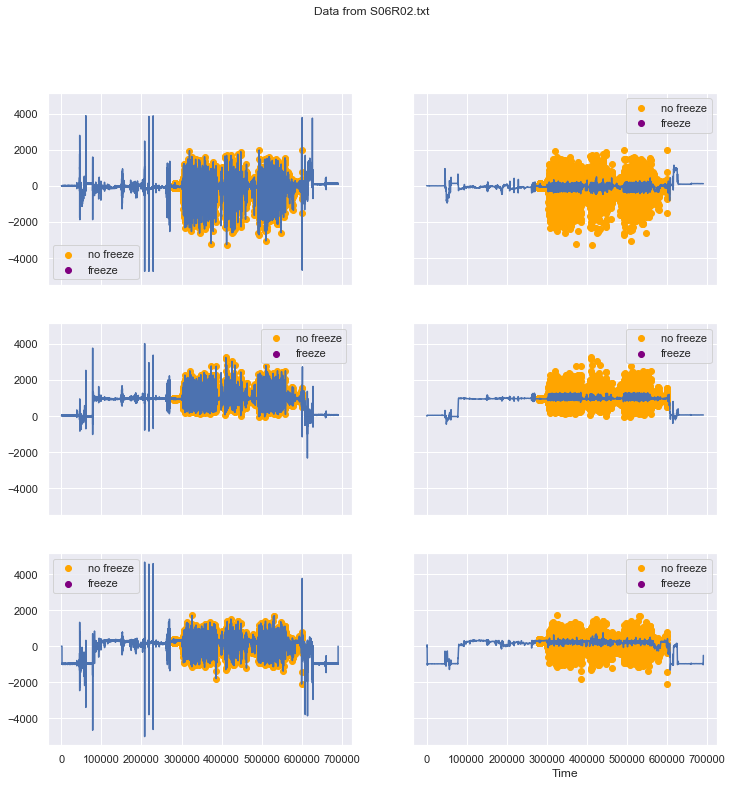

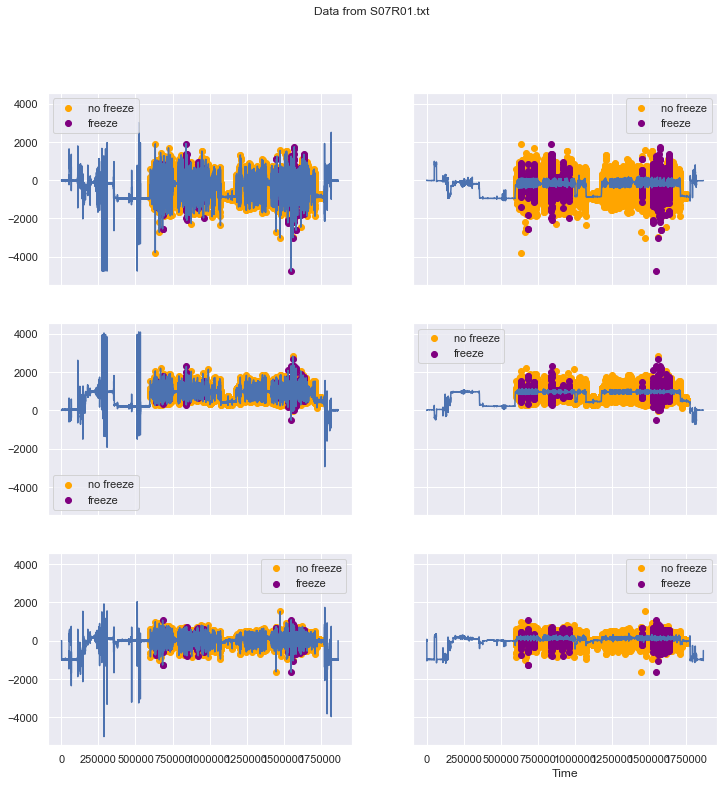

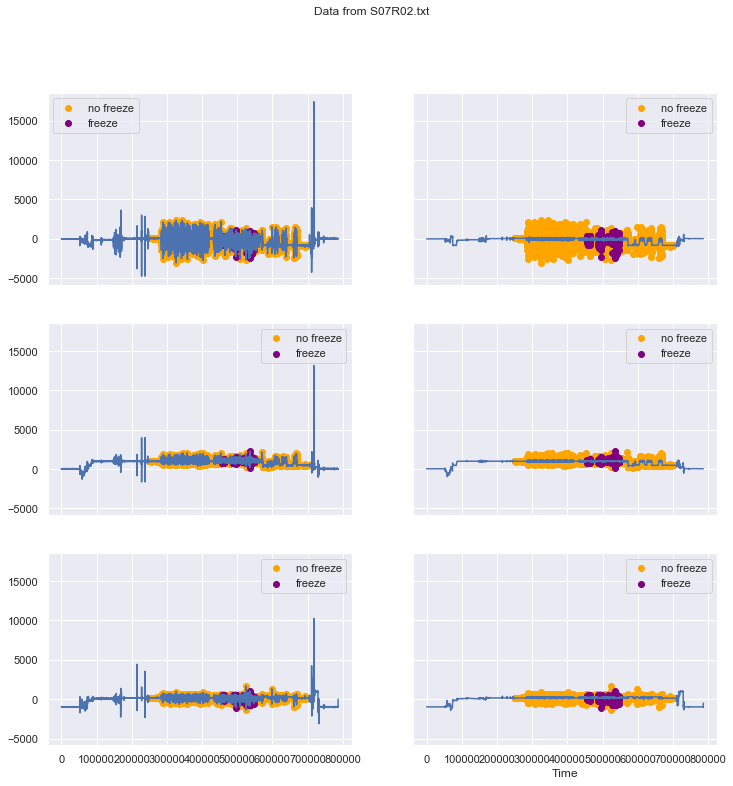

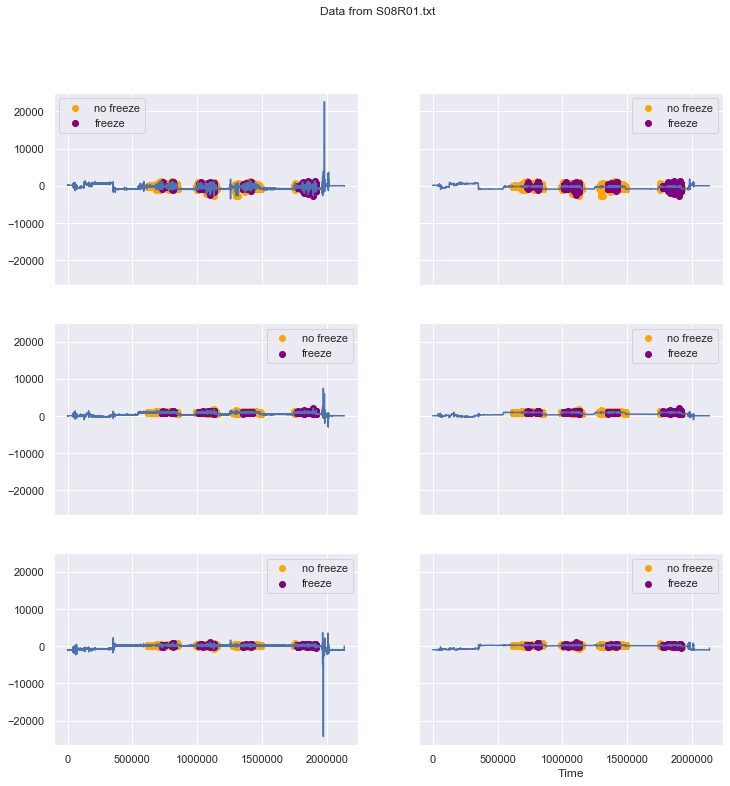

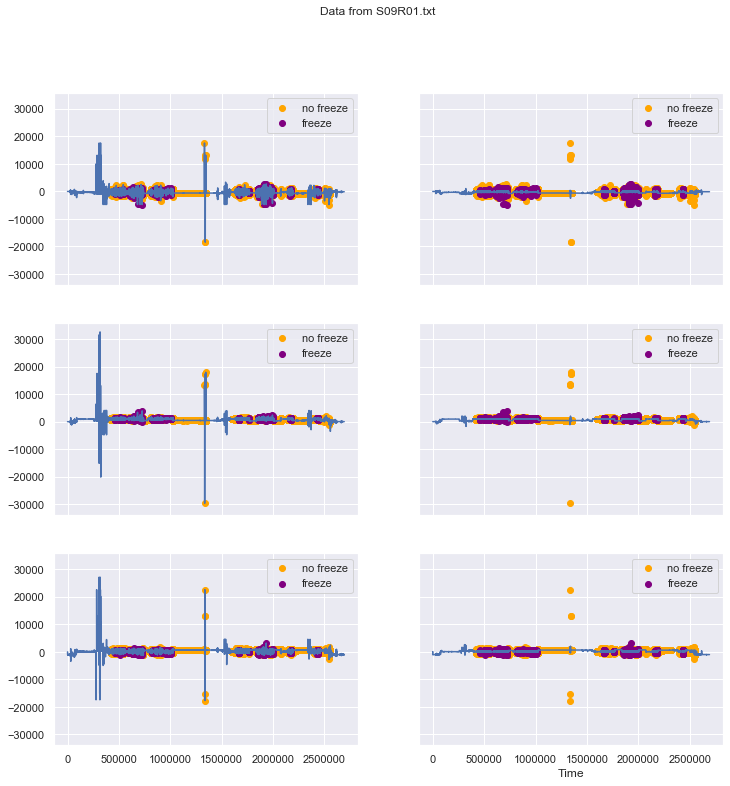

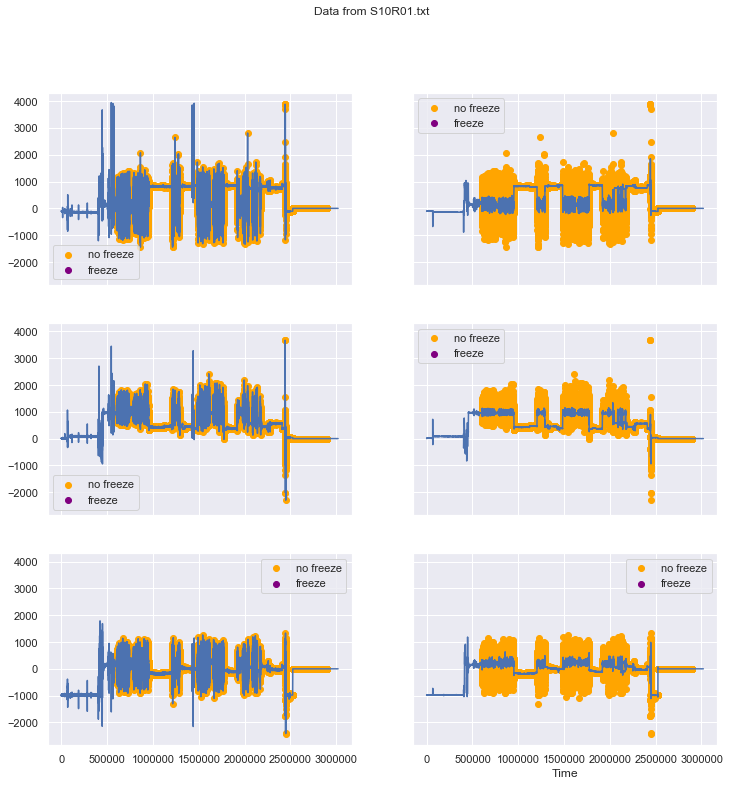

In [144]:
import scipy as sp
from sklearn import neighbors
from scipy import signal

for ind in range(len(daphnet)):
    df = daphnet[ind]
    sub1 = df[df.annotations == 1]
    sub2 = df[df.annotations == 2]
    
    fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(12, 12))
    fig.suptitle("Data from "+names[ind])
    plt.xlabel("Time")
    
    labels = ["thigh_h_fd", "thigh_v", "thigh_h_l"]
    for i in range(3):
        sig = sp.signal.medfilt(df[labels[i]], 21)

        b, a = signal.butter(5,0.05)
        y = signal.filtfilt(b, a, df[labels[i]])
        
        
        ax1 = axes[i][0]
        ax1.plot(df.time, df[labels[i]])
        ax1.scatter(sub1.time, sub1[labels[i]], c='orange', label="no freeze")
        ax1.scatter(sub2.time, sub2[labels[i]], c='purple', label="freeze")
        ax1.legend()

        ax2 = axes[i][1]
        ax2.plot(df.time, y)
        ax2.scatter(sub1.time, sub1[labels[i]], c='orange', label="no freeze")
        ax2.scatter(sub2.time, sub2[labels[i]], c='purple', label="freeze")
        ax2.legend()
        
    plt.show()


### Code given by Dataset
Translated from Octave

In [132]:
from matplotlib import mlab

In [123]:
import np

SR = 64            # Sample rate in hetrz
stepSize = 32      # Step size in samples
offDelay = 2       # Evaluation delay in seconds: tolerates delay after detecting
onDelay = 2        # Evaluation delay in seconds: tolerates delay before detecting

NFFT = windowLength = 256
locoBand = np[0, 5, 3]
freezeBand = np[3, 8]

f_res = SR / NFFT
f_nr_LBs = np.round(locoBand[0] / f_res)
f_nr_LBe = np.round(locoBand[1] / f_res)
f_nr_FBs = np.round(freezeBand[0] / f_res)
f_nr_FBe = np.round(freezeBand[1] / f_res)

d = NFFT/2


def numerical_Integration(x):
    """
    Do numerical integration of x
    """
    return (np.sum(x[1:])/SR+np.sum(x[:-1])/SR)/2





def fi(data):
    """
    Compute the freezing index
    """
    
    
    jPos = windowLength
    i_max = len(data) // stepSize
    
    time = np.zeros(i_max - 1)
    sumLocoFreeze = np.zeros(i_max - 1)
    freezeIndex = np.zeros(i_max - 1)
    
    for i in range(i_max - 1):
        jStart = i * stepSize
        jPos = jStart + windowLength
        
        # Time (sample nr) of this window
        time[i] = jPos
        
        # get the signal in the window
        y = data[jStart:jPos]
        y -= np.mean(y) # make signal zero-mean (mean normalization)
        
        # compute FFT (Fast Fourier Transform)
        Y = np.fft.fft(y, NFFT)
        Pyy = Y * np.conj(Y) / NFFT
        
        
        # --- calculate sumLocoFreeze and freezeIndex ---
        areaLocoBand = numericalIntegration(Pyy[f_nr_LBs:f_nr_LBe])
        areaFreezeBand = numericalIntegration(Pyy[f_nr_FBs:f_nr_FBe])
        
        sumLocoFreeze[i] = areaFreezeBand + areaLocoBand
        freezeIndex[i] = areaFreezeBand / areaLocoBand
    
    return sumLocoFreeze, freezeIndex, time




"""
Count the true pos, false pos, etc in frames

gtframe: column vector of ground truth of frame
lframe: column vector classification result of frame
offDelay/onDelay: tolerance for latency in the algorithm. Specified in frames.

The latency-tolerance can only be used with binary labels : 0=nothing, 1=event

Returns: [TP TN FP FN Nev]
Nev: number of events in the ground truth data
"""

def countTxFx(gtframe, lframe, offDelay, onDelay):
    """
    Count the true pos, false pos, etc in frames

    gtframe: column vector of ground truth of frame
    lframe: column vector classification result of frame
    offDelay/onDelay: tolerance for latency in the algorithm. Specified in frames.

    The latency-tolerance can only be used with binary labels : 0=nothing, 1=event

    Returns: [TP TN FP FN Nev]
    Nev: number of events in the ground truth data
    """
    
    # Want here to create labels tolerating algorithm latency in the
    # transitions from nothing->event and event->nothing. 
    # For this we need gtframedelayoff and grframedelayon that are 
    # variants of gtframe with delay.
    # This is built using a help 'labels' array.
    
    # Convert the frame labels to the format: [fromsample tosample]
    f = np.vstack((1, np.where(gtframe[1:]-gtframe[:-1]), np.size(gtframe, 1))) # add a discontinuity at the start and end
    # convert
    labels = np.array([])        # [fromframe toframe] where there is an event
    for li in range(np.size(f, 1)-1):
        if gtframe[f[li]+1] == 1: labels = np.vstack((labels, np[f[li]+1, f[li+1]]))
    
    # Labels for delay
    gtframedelayoff = np.zeros(np.size(gtframe, 1), 1)
    gtframedelayon = np.zeros(np.size(gtframe, 1), 1)
    s = np.arange(np.size(labels, 1)) + 1
    for li in range(np.size(labels, 1)):
        s_index = mlab.find(s >= labels[li, 0], )
    
    
    
    
    

SyntaxError: invalid syntax (<ipython-input-123-d24649507741>, line 15)